# Assessment for Computer Infrastrucure Module

## Introduction

As submission for the Computer Infrastructure Module assessment, his notebook presents the following:  

- *Problem 1*:  
The use of the function "get_data()" to download hourly data from [Yahoo! Finance](https://finance.yahoo.com/) for the previous five days for the five FAANG stocks (Facebook [META], Apple [APPL], Amazon [AMZN] Netflix [NFLX], and Google [GOOG]), saving the output as a csv file in the data folder of the repository. 
- *Problem 2*:  
The use of the function "plot_data()" to open the latest file in the data folder, access the most recent data file, and to plot the "Close" prices for each of the five stocks on a single plot. The output is saved in the "plots" folder in the repository. 


In generating the above code, several supporting steps such as viewing the data and the index, checking the data type, rough graphing, etc. are carried out to assess the progress of, and to sanity check, the work to ensure the code correctly carries out the desired function and delivers the correct output.

As well the outputs in this notebook and in the data and plots folders of the repository, the code presented in this notebook is used in further workings, as follows:  

- The functions in Problems 1 and 2 and contained in a script (faang.py; saved in the main branch of the repository) which allows the user to automatically a) download and save hourly FAANG stock data from the last five days to the data folder of the repository and b) and to create and save a plot of the "Close" prices to the "plots" folder of the repository, upon typing the command "./faang.py" in the terminal  
- Finally, a GitHub Actions workflow (using the script faang.yml saved in the .github/workflows/ folder of the repository) runs the faang.py script every Saturday morning at 9.17am [UTC](https://docs.github.com/en/actions/how-tos/administer/view-metrics) (which is currently the same as [local Irish time](https://www.timeanddate.com/worldclock/converted.html?p1=0&p2=78))

## Problem 1: Data from yfinance

Create a function that downloads all hourly data for the previous five days for the five FAANG stocks, using [yfinance](https://github.com/ranaroussi/yfinance) Python package:
- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

In [1]:
# Import modules.

# Import os for file handling.
import os

# Import pandas.
import pandas as pd

# Import matplotlib for plotting.
import matplotlib.pyplot as plt

# Dates and times.
import datetime as dt

# Import yFinance (Yahoo Finance).    
import yfinance as yf

### Download historical data for the five companies

In [2]:
# Get data for the five companies (multiple tickers at once), using df to persist the data frame.
# Using lecture information/code as reference.

def get_data():
    # Define the FAANG stocks.
    faang_stocks = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']

    # Get hourly data for the last 5 days for multiple tickers.
    # yf documentation: https://ranaroussi.github.io/yfinance/
    data = yf.download(tickers=faang_stocks, period='5d', interval='1h')
    
    return data

# Store the get_data() function data in a dataframe.
# https://chatgpt.com/share/6946d8c5-17f0-800d-8254-e37bc94cd380
df = get_data()

# For sanity check, print the first few rows of the dataframe.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html
print(df.head())

/tmp/ipykernel_81819/3516568182.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers=faang_stocks, period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   
2025-12-15 17:30:00+00:00  274.040009  222.375000  307.450012  650.219971   
2025-12-15 18:30:00+00:00  273.369995  223.222595  308.540009  651.219971   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-15 14:30:00+00:00  94.004997  280.049988  227.500000  311.359985   
2025-12-15 15:30:00+00:00  94.430000  275.640411  224.389999  309.390015   
202

In [3]:
# Display the columns of the dataframe to examine its structure.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html

df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

In [4]:
# Examine the index.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html

df.index

DatetimeIndex(['2025-12-15 14:30:00+00:00', '2025-12-15 15:30:00+00:00',
               '2025-12-15 16:30:00+00:00', '2025-12-15 17:30:00+00:00',
               '2025-12-15 18:30:00+00:00', '2025-12-15 19:30:00+00:00',
               '2025-12-15 20:30:00+00:00', '2025-12-16 14:30:00+00:00',
               '2025-12-16 15:30:00+00:00', '2025-12-16 16:30:00+00:00',
               '2025-12-16 17:30:00+00:00', '2025-12-16 18:30:00+00:00',
               '2025-12-16 19:30:00+00:00', '2025-12-16 20:30:00+00:00',
               '2025-12-17 14:30:00+00:00', '2025-12-17 15:30:00+00:00',
               '2025-12-17 16:30:00+00:00', '2025-12-17 17:30:00+00:00',
               '2025-12-17 18:30:00+00:00', '2025-12-17 19:30:00+00:00',
               '2025-12-17 20:30:00+00:00', '2025-12-18 14:30:00+00:00',
               '2025-12-18 15:30:00+00:00', '2025-12-18 16:30:00+00:00',
               '2025-12-18 17:30:00+00:00', '2025-12-18 18:30:00+00:00',
               '2025-12-18 19:30:00+00:00', '2025-1

In [5]:
# Find current data and time.
# https://docs.python.org/3/library/datetime.html

now = dt.datetime.now()

# Show
now

datetime.datetime(2025, 12, 20, 18, 19, 4, 135444)

In [6]:
# Format data and time.
# https://docs.python.org/3/library/datetime.html

now.strftime("%Y%m%d-%H%M%S")

'20251220-181904'

In [7]:
# Save data as CSV, changing the file name to include date and time.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
# Using lecture code as reference.

df.to_csv("data/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv")

## Problem 2


On the one plot, plot "Close" prices for each of the five FAANG stocks. 

Prior to plotting, examine the dataframe to determine the information required to create the desired plot. 

In [8]:
# Examine data types in the 'Close' columns of df before plotting.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html

df['Close'].dtypes

Ticker
AAPL    float64
AMZN    float64
GOOG    float64
META    float64
NFLX    float64
dtype: object

In [9]:
# Check the columns.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html

print(df.columns)

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])


<Axes: xlabel='Datetime'>

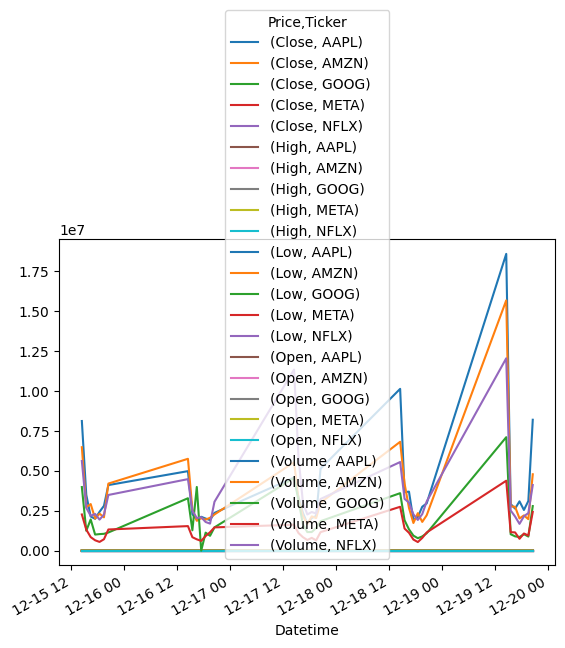

In [10]:
# Prior to creating the target plot, call df.plot() to have a look at the data.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

df.plot()

In [13]:
# Conversation troubleshooting plotting issues with ChatGPT: 
# https://chatgpt.com/share/693c7f21-60e4-800d-b154-feaa2fe184ef
# Chat commented in the code below helped tidy up code for final version.

# Define the plot_data() function.
def plot_data():
    # Locate the latest datafile.
    # https://www.geeksforgeeks.org/python/python-get-list-of-files-in-directory-sorted-by-size/
    data_files = sorted(os.listdir('data/'))
    # Get the latest file.
    latest_file = "data/" + data_files[-1]
   
    # Load datafile (csv).
    # https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
    df = pd.read_csv(latest_file, header=[0,1], index_col=0, parse_dates=True)
    
    # Convert index to datetime.
    # https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
    df.index = pd.to_datetime(df.index)
    
    # Define the columns to plot.
    # Referencing lecture code.
    close_df = df['Close']

    # Create a plot.
    # Referencing lecture code.
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
    fig, ax = plt.subplots(figsize=(10, 6))
    close_df.plot(ax=ax)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)') 
    ax.legend(title='Closing Stocks', loc='upper right')   
    
    # Set the plot title to current date.
    ax.set_title(dt.datetime.now().strftime("%Y-%m-%d"))
    
    # Current date and time.
    # https://docs.python.org/3/library/datetime.html
    now = dt.datetime.now()
    
    # ChatGPT help with file paths: 
    # https://chatgpt.com/share/6946e855-a794-800d-9030-1f50c7eb3aa3
    filename = "plots/" + now.strftime("%Y%m%d-%H%M%S.png")

    # Save figure.
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
    fig.savefig(filename, dpi=300, bbox_inches="tight")
    plt.close(fig)
    
    print(f"Saved plot to {filename}")

# Call the function to generate and save the plot.    
plot_data()

Saved plot to plots/20251220-183018.png


## Conclusion

The code contained in Problem 1 and 2 above, along with the faang.py and faang.yml files saved in the root of this repository effectively allow the automated download of hourly FAANG stock data from the last five days from yFinance, as well as the plot of the Closing Prices for all five stocks.  

Specifically, the code in Problem 1 and Problem 2 above a) allows the manual (when running the code within this Jupyter notebook) download of all hourly data for the last five days for the FAANG stocks and b) the plotting (Close prices only) of these data. The resulting csv file (data) is date- and time-stamped at the time the download is saved, and the png file (plot) is time- and date-stamped at the time the plot is run and saved (within seconds of the plot time). It may or may not be more favourable to name the plot the same name as the csv file is it plotting, instead of having them saved at a separate (though similar) time. This would be considered in relation to the workflow, processes and outputs of specific real-world work streams; at this time, it is sufficient to allow the function to save the plot with the name of the time the plot itself was saved.   

A script (faang.py), saved in the main branch of the repository, contains the copied code from Problem 1 and 2 above. A GitHub Actions script (faang.yml), using GitHug Actions, triggers the faang.py file to run every Saturday morning at 9.17am, automatically downloading and saving to the "data" folder hourly FAANG stock data for the previous 5 days and automatically plotting the Close prices for the five stocks for that data download, saving the plot in the "plots" folder. 

## END